In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Dataset_Rekomendasi_Tanaman.csv')

In [ ]:
df.head()

,Nitrogen (N),Fosforus (P),Kalium (K),Suhu,Kelembaban,pH,Curah Hujan,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi


In [ ]:
df.tail()

,Nitrogen (N),Fosforus (P),Kalium (K),Suhu,Kelembaban,pH,Curah Hujan,Label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,kopi
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,kopi
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,kopi
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,kopi
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,kopi


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['Nitrogen (N)', 'Fosforus (P)', 'Kalium (K)', 'Suhu', 'Kelembaban',
       'pH', 'Curah Hujan', 'Label'],
      dtype='object')

In [ ]:
df['Label'].unique()

array(['padi', 'jagung', 'buncis', 'kacang merah', 'kacang polong',
       'kacang ngengat', 'kacang hijau', 'kacang lentil hitam', 'lentil',
       'delima', 'pisang', 'mangga', 'anggur', 'semangka',
       'melon kesturi', 'apel', 'jeruk', 'pepaya', 'kelapa', 'kapas',
       'yute', 'kopi'], dtype=object)

In [ ]:
df.dtypes

Nitrogen (N)      int64
Fosforus (P)      int64
Kalium (K)        int64
Suhu            float64
Kelembaban      float64
pH              float64
Curah Hujan     float64
Label            object
dtype: object

In [ ]:
df['Label'].value_counts()

padi                   100
jagung                 100
yute                   100
kapas                  100
kelapa                 100
pepaya                 100
jeruk                  100
apel                   100
melon kesturi          100
semangka               100
anggur                 100
mangga                 100
pisang                 100
delima                 100
lentil                 100
kacang lentil hitam    100
kacang hijau           100
kacang ngengat         100
kacang polong          100
kacang merah           100
buncis                 100
kopi                   100
Name: Label, dtype: int64

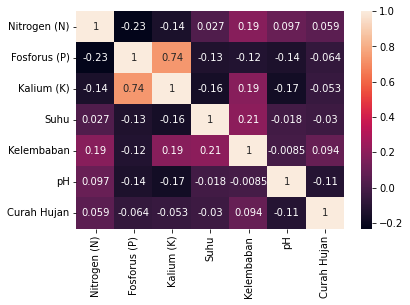

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Memisahkan fitur dan label target**

In [ ]:
features = df[['Nitrogen (N)', 'Fosforus (P)','Kalium (K)','Suhu', 'Kelembaban', 'pH', 'Curah Hujan']]
target = df['Label']
#features = df[['Suhu', 'Kelembaban', 'pH', 'Curah Hujan']]
labels = df['Label']

In [ ]:
# Inisialisasi list kosong untuk menambahkan semua nama model dan nama yang sesuai
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

nilai_prediksi = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, nilai_prediksi)
acc.append(x)
model.append('Decision Tree')
print("Akurasi Decision Tree: ", x*100)

print(classification_report(Ytest,nilai_prediksi))

Akurasi Decision Tree:  90.0
                     precision    recall  f1-score   support

             anggur       1.00      1.00      1.00        18
               apel       1.00      1.00      1.00        13
             buncis       1.00      1.00      1.00        21
             delima       1.00      1.00      1.00        17
             jagung       1.00      1.00      1.00        21
              jeruk       1.00      1.00      1.00        29
       kacang hijau       1.00      1.00      1.00        24
kacang lentil hitam       0.59      1.00      0.74        16
       kacang merah       0.00      0.00      0.00        14
     kacang ngengat       0.00      0.00      0.00        19
      kacang polong       0.62      1.00      0.77        18
              kapas       1.00      1.00      1.00        20
             kelapa       0.91      1.00      0.95        21
               kopi       1.00      1.00      1.00        22
             lentil       0.68      1.00      0.81     

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Nilai cross validation (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.85909091, 0.93636364])

Menyimpan trained model dari Decision Tree

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '/content/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

nilai_prediksi = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, nilai_prediksi)
acc.append(x)
model.append('Naive Bayes')
print("Akurasi Naive Bayes: ", x*100)

print(classification_report(Ytest,nilai_prediksi))

Akurasi Naive Bayes:  99.0909090909091
                     precision    recall  f1-score   support

             anggur       1.00      1.00      1.00        18
               apel       1.00      1.00      1.00        13
             buncis       1.00      1.00      1.00        21
             delima       1.00      1.00      1.00        17
             jagung       1.00      1.00      1.00        21
              jeruk       1.00      1.00      1.00        29
       kacang hijau       1.00      1.00      1.00        24
kacang lentil hitam       1.00      1.00      1.00        16
       kacang merah       1.00      1.00      1.00        14
     kacang ngengat       1.00      1.00      1.00        19
      kacang polong       1.00      1.00      1.00        18
              kapas       1.00      1.00      1.00        20
             kelapa       1.00      1.00      1.00        21
               kopi       1.00      1.00      1.00        22
             lentil       1.00      1.00     

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '/content/NaiveBayes.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
nilai_prediksi = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, nilai_prediksi)
acc.append(x)
model.append('SVM')
print("Akurasi SVM: ", x*100)

print(classification_report(Ytest,nilai_prediksi))

Akurasi SVM:  97.72727272727273
                     precision    recall  f1-score   support

             anggur       1.00      1.00      1.00        18
               apel       1.00      1.00      1.00        13
             buncis       1.00      1.00      1.00        21
             delima       1.00      1.00      1.00        17
             jagung       1.00      0.95      0.98        21
              jeruk       1.00      1.00      1.00        29
       kacang hijau       1.00      1.00      1.00        24
kacang lentil hitam       1.00      1.00      1.00        16
       kacang merah       1.00      1.00      1.00        14
     kacang ngengat       1.00      1.00      1.00        19
      kacang polong       1.00      1.00      1.00        18
              kapas       0.95      1.00      0.98        20
             kelapa       1.00      1.00      1.00        21
               kopi       1.00      0.95      0.98        22
             lentil       1.00      1.00      1.00  

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.97727273, 0.98863636, 0.98863636, 0.98181818])

In [ ]:
#Saving trained SVM model
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '/content/SVM.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

nilai_prediksi = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, nilai_prediksi)
acc.append(x)
model.append('Logistic Regression')
print("Akurasi Logistic Regression: ", x*100)

print(classification_report(Ytest,nilai_prediksi))

Akurasi Logistic Regression:  95.22727272727273
                     precision    recall  f1-score   support

             anggur       1.00      1.00      1.00        18
               apel       1.00      1.00      1.00        13
             buncis       1.00      1.00      1.00        21
             delima       1.00      1.00      1.00        17
             jagung       0.90      0.86      0.88        21
              jeruk       1.00      1.00      1.00        29
       kacang hijau       1.00      0.96      0.98        24
kacang lentil hitam       0.86      0.75      0.80        16
       kacang merah       1.00      1.00      1.00        14
     kacang ngengat       0.84      0.84      0.84        19
      kacang polong       1.00      1.00      1.00        18
              kapas       0.86      0.90      0.88        20
             kelapa       1.00      1.00      1.00        21
               kopi       1.00      1.00      1.00        22
             lentil       0.88      

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

In [ ]:
import pickle
# Dump the trained Logistic Regression classifier with Pickle
LR_pkl_filename = '/content/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

nilai_prediksi = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, nilai_prediksi)
acc.append(x)
model.append('RF')
print("Akurasi Random Forest: ", x*100)

print(classification_report(Ytest,nilai_prediksi))

Akurasi Random Forest:  99.0909090909091
                     precision    recall  f1-score   support

             anggur       1.00      1.00      1.00        18
               apel       1.00      1.00      1.00        13
             buncis       1.00      1.00      1.00        21
             delima       1.00      1.00      1.00        17
             jagung       1.00      1.00      1.00        21
              jeruk       1.00      1.00      1.00        29
       kacang hijau       1.00      1.00      1.00        24
kacang lentil hitam       0.94      1.00      0.97        16
       kacang merah       1.00      1.00      1.00        14
     kacang ngengat       1.00      0.95      0.97        19
      kacang polong       1.00      1.00      1.00        18
              kapas       1.00      1.00      1.00        20
             kelapa       1.00      1.00      1.00        21
               kopi       1.00      1.00      1.00        22
             lentil       1.00      1.00   

In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99318182, 0.98863636])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '/content/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

**XGBoost**

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

nilai_prediksi = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, nilai_prediksi)
acc.append(x)
model.append('XGBoost')
print("Akurasi XGBoost: ", x*100)

print(classification_report(Ytest,nilai_prediksi))

Akurasi XGBoost:  99.31818181818181
                     precision    recall  f1-score   support

             anggur       1.00      1.00      1.00        18
               apel       1.00      1.00      1.00        13
             buncis       1.00      1.00      1.00        21
             delima       1.00      1.00      1.00        17
             jagung       1.00      1.00      1.00        21
              jeruk       1.00      1.00      1.00        29
       kacang hijau       1.00      1.00      1.00        24
kacang lentil hitam       1.00      1.00      1.00        16
       kacang merah       1.00      1.00      1.00        14
     kacang ngengat       1.00      1.00      1.00        19
      kacang polong       1.00      1.00      1.00        18
              kapas       1.00      1.00      1.00        20
             kelapa       1.00      1.00      1.00        21
               kopi       1.00      1.00      1.00        22
             lentil       1.00      1.00      1.

In [ ]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = '/content/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

**Accuracy Comparison**

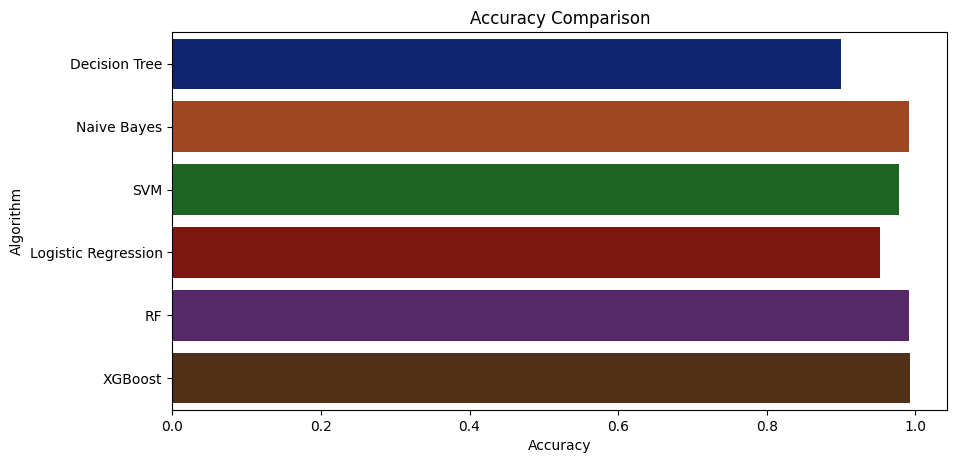

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc ,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9772727272727273
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.9931818181818182


**Making a prediction**

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = NaiveBayes.predict(data)
print(prediction)

['kopi']


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = LogReg.predict(data)
print(prediction)

['yute']
